In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dimension = 2
iteration = 1000
burn_in = 100
temperatures = [0, 0.2, 0.5, 0.8, 1]

### Fitness Functions

In [3]:
selected_fitness = 'distance'
def fitness(sample):
    return eval('fitness_' + selected_fitness + '(sample)')

In [4]:
target = np.ones(dimension) * 0.8
sigma = 0.25

def fitness_distance(sample):
    difference = sample - target
    if isinstance(sample, list):
        norm = np.linalg.norm(difference)
    else:
        norm = np.linalg.norm(difference, axis=1)
    
    return np.e ** (-norm ** 2 / (2 * sigma**2))

In [5]:
def fitness_sum(sample):
    if isinstance(sample, list):
        return sum(sample)
    else:
        return np.sum(sample,axis=1)

### Plotting Function

In [20]:
def plot_samples(samples):

    samples_plot = np.array(samples)
    
    f, axisArray = plt.subplots(1,dimension+1, sharey=True)
    f.set_figwidth(20)

    axisArray[0].hist(np.sum(samples_plot,axis=1), 50, facecolor='green')
    axisArray[0].set_xlim([0,dimension])
    for d in range(dimension):
        axisArray[d+1].hist(samples_plot[:,d], 50)
        axisArray[d+1].set_xlim([0,1])
        
    plt.show()

### Rejection Sampling

In [7]:
def rejection_sampling(offset):
    while(True):
        x = np.random.rand()
        y = np.random.rand() * (1+offset)
        if(y < x+offset):
            break
    return x

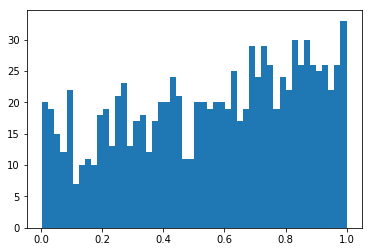

In [8]:
offset = 1

X = []
for i in range(iteration):
    X.append(rejection_sampling(offset))

plt.hist(X,50)
plt.show()

### Importance Sampling - Resampling

In [9]:
def resampling(samples, weights, sample_count):
    weights_normalized = weights / sum(weights)
    selected = np.random.choice(range(len(samples)), size=sample_count, p=weights_normalized, replace=True)
    return samples[selected,:]

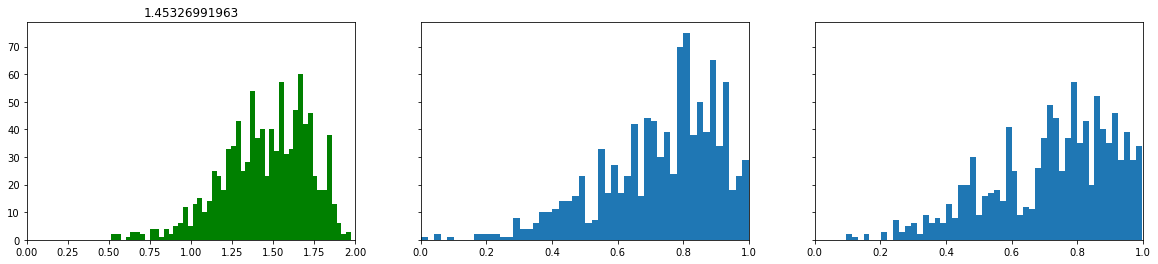

In [10]:
samples = np.random.rand(iteration,dimension)

weights = fitness(samples)
samples = resampling(samples, weights, iteration)

plot_samples(samples)

### Proposal Functions

In [11]:
def proposal_random_mutation(sample):
    candidate = list(sample)
    candidate[np.random.choice(len(candidate))] = np.random.rand()
    return candidate

In [12]:
def proposal_random_sample(sample):
    return np.random.rand(len(sample))

### Metropolis-Hastings

In [13]:
def kernel_mcmc(sample, proposal, acceptance):
    
    candidate = proposal(sample)
    
    alpha = acceptance(sample, candidate)
    
    if np.random.rand() < alpha:
        return candidate
    else:
        return sample

In [14]:
def acceptance(sample, candidate):
    return fitness(candidate) / fitness(sample)

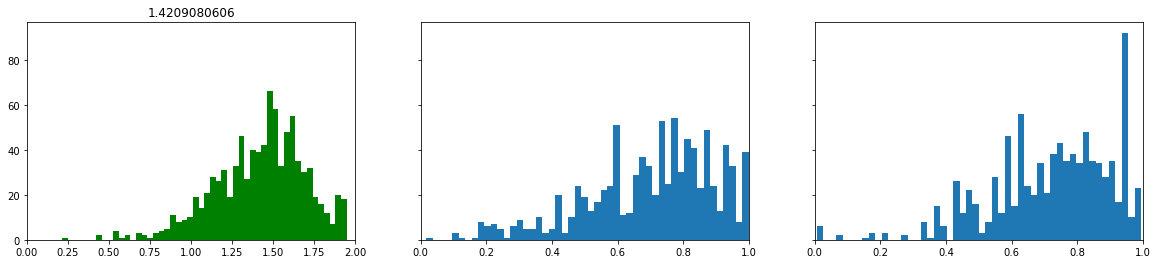

In [15]:
samples = []
sample = list(np.random.rand(dimension))

for i in range(iteration):
    sample = kernel_mcmc(sample, proposal_random_mutation, acceptance)
    samples.append(sample)

plot_samples(samples[burn_in:])

### Gibbs Sampling

In [16]:
# Gibbs Kernel specific to sum fitness function
def kernel_gibbs_sum(sample,d):
    candidate = list(sample)
    
    offset = sum(candidate) - candidate[d]
    candidate[d] = rejection_sampling(offset)
    
    return candidate

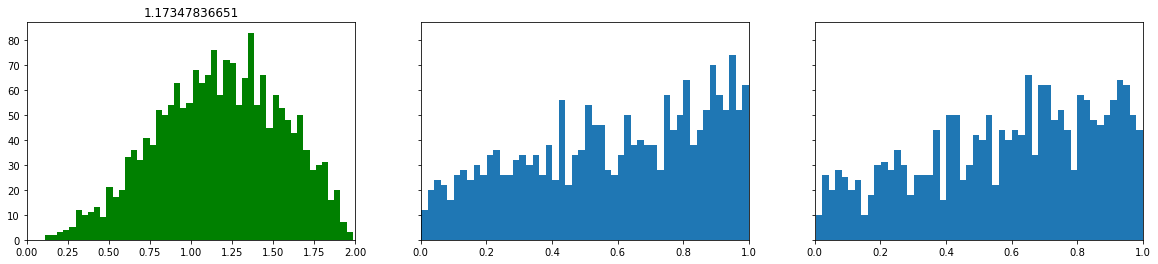

In [17]:
samples = []
sample = np.random.rand(dimension)

for i in range(iteration):
    for d in range(dimension):    
        sample = kernel_gibbs_sum(sample,d)
        samples.append(sample)

plot_samples(samples[burn_in:])